붓꽃 데이터를 로드하시고, DecisionTree 모델로 시각화해 보세요.
iris_dataset = load_iris()

1.
모든 리프 노드가 순수 노드일 때와 max_depth = 3 때의
훈련 세트와 테스트 세트의 점수와 모델 시각화 자료를 비교해 보세요.
(test_size = 20%만 사용하세요.)

2. feature importance를 시각화 하세요.

In [49]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [59]:
# stratify: stratify값을 target으로 지정하면 class 비율을 train/validation에 유지

In [48]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    stratify=iris.target,
                                                    random_state=42,
                                                   test_size = 0.2)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.967


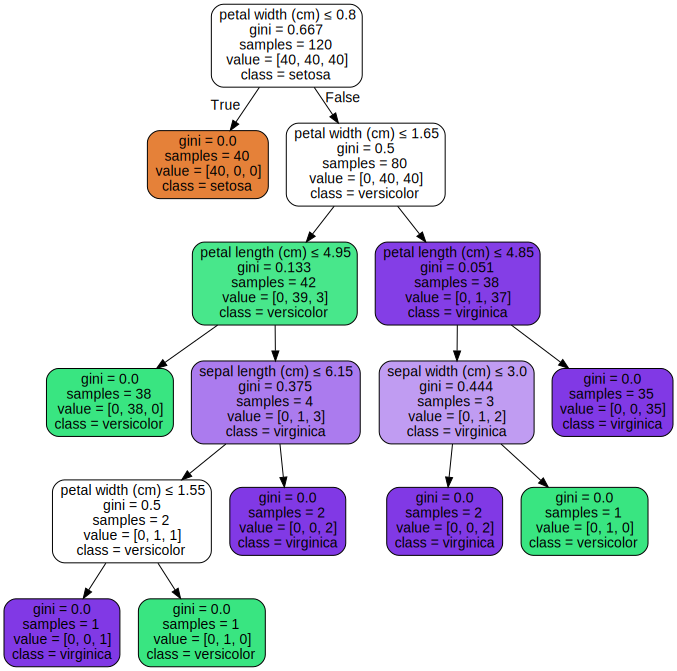

In [50]:
dot_data = export_graphviz(tree,
                          out_file=None,
                          feature_names = iris.feature_names,
                          class_names = iris.target_names,
                          filled=True,
                          rounded=True,
                          special_characters  = True)
graph = graphviz.Source(dot_data)
graph

In [51]:
print("특성 중요도:\n{}".format(tree.feature_importances_))

특성 중요도:
[0.00625    0.01666667 0.0585683  0.91851504]


C:\Users\user\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


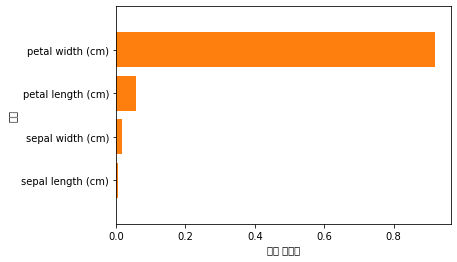

In [52]:
def plot_feature_importances_cancer(model):
    n_features = iris.data.shape[1]
    plt.barh(np.arange(n_features), tree.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), iris.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

plot_feature_importances_cancer(tree)

In [8]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    stratify=iris.target,
                                                    random_state=42,
                                                   test_size = 0.2)
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.983
테스트 세트 정확도: 0.967


In [11]:
pred = tree.predict(X_test)

In [13]:
(pred == y_test).mean() # Accuracy

0.9666666666666667

# export_graphviz

In [10]:
from sklearn.tree import export_graphviz

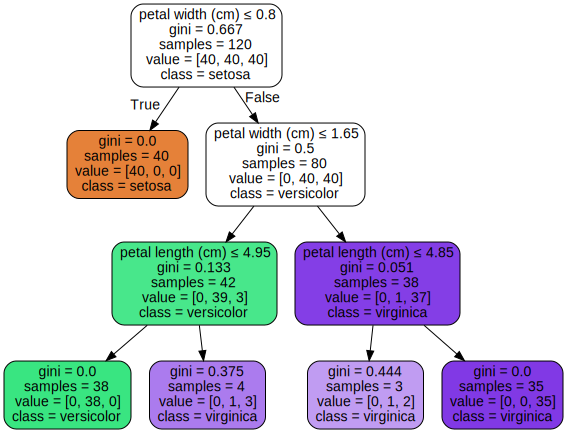

In [21]:
dot_data = export_graphviz(tree,
                          out_file=None,
                          feature_names = iris.feature_names,
                          class_names = iris.target_names,
                          filled=True,
                          rounded=True,
                          special_characters  = True)
graph = graphviz.Source(dot_data)
graph

In [22]:
print("특성 중요도:\n{}".format(tree.feature_importances_))

특성 중요도:
[0.         0.         0.06071875 0.93928125]


In [27]:
import seaborn as sns

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\user\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [31]:
for name, value in zip(iris.feature_names , tree.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

sepal length (cm) : 0.000
sepal width (cm) : 0.000
petal length (cm) : 0.061
petal width (cm) : 0.939


<AxesSubplot:>

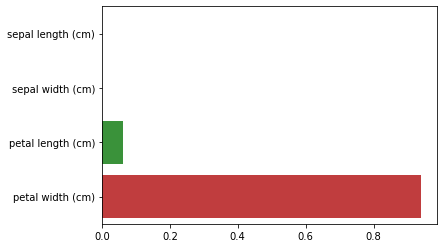

In [32]:
sns.barplot(x=tree.feature_importances_ , y=iris.feature_names)

In [38]:
import matplotlib.pyplot as plt
import numpy as np

sepal length (cm) : 0.000
sepal width (cm) : 0.000
petal length (cm) : 0.061
petal width (cm) : 0.939


<AxesSubplot:>

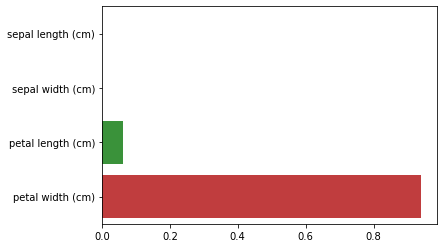

In [42]:
import seaborn as sns
%matplotlib inline

for name, value in zip(iris.feature_names, tree.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
    
sns.barplot(x=tree.feature_importances_, y = iris.feature_names)

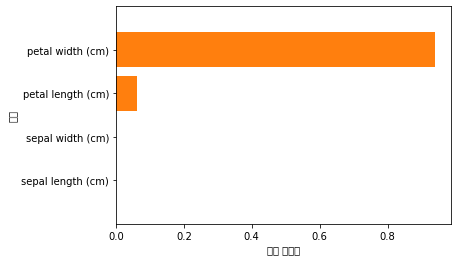

In [46]:
def plot_feature_importances_cancer(model):
    n_features = iris.data.shape[1]
    plt.barh(np.arange(n_features), tree.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), iris.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

plot_feature_importances_cancer(tree)

# DeicisionTree 이미지 저장

In [ ]:
#dot=graphviz.Source(dot_graph); dot.format= 'png'; dot.render(filename='tree.png')